SETUP

In [1]:
pip install tensorflow


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import math

from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2, l1_l2




In [3]:
df = pd.read_csv('/content/sample_sales_data.csv')

DATA ANALYSIS

In [4]:
print(df.head())

   Unnamed: 0                        transaction_id            timestamp  \
0           0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  2022-03-02 09:51:38   
1           1  931ad550-09e8-4da6-beaa-8c9d17be9c60  2022-03-06 10:33:59   
2           2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea  2022-03-04 17:20:21   
3           3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4  2022-03-02 17:23:58   
4           4  a81a6cd3-5e0c-44a2-826c-aea43e46c514  2022-03-05 14:32:43   

                             product_id category customer_type  unit_price  \
0  3bc6c1ea-0198-46de-9ffd-514ae3338713    fruit          gold        3.99   
1  ad81b46c-bf38-41cf-9b54-5fe7f5eba93e    fruit      standard        3.99   
2  7c55cbd4-f306-4c04-a030-628cbe7867c1    fruit       premium        0.19   
3  80da8348-1707-403f-8be7-9e6deeccc883    fruit          gold        0.19   
4  7f5e86e6-f06f-45f6-bf44-27b095c9ad1d    fruit         basic        4.49   

   quantity  total payment_type  
0         2   7.98     e-wallet  
1     

In [5]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

print(df.head())

                         transaction_id            timestamp  \
0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  2022-03-02 09:51:38   
1  931ad550-09e8-4da6-beaa-8c9d17be9c60  2022-03-06 10:33:59   
2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea  2022-03-04 17:20:21   
3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4  2022-03-02 17:23:58   
4  a81a6cd3-5e0c-44a2-826c-aea43e46c514  2022-03-05 14:32:43   

                             product_id category customer_type  unit_price  \
0  3bc6c1ea-0198-46de-9ffd-514ae3338713    fruit          gold        3.99   
1  ad81b46c-bf38-41cf-9b54-5fe7f5eba93e    fruit      standard        3.99   
2  7c55cbd4-f306-4c04-a030-628cbe7867c1    fruit       premium        0.19   
3  80da8348-1707-403f-8be7-9e6deeccc883    fruit          gold        0.19   
4  7f5e86e6-f06f-45f6-bf44-27b095c9ad1d    fruit         basic        4.49   

   quantity  total payment_type  
0         2   7.98     e-wallet  
1         1   3.99     e-wallet  
2         2   0.38     e-wallet  
3         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [7]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [8]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

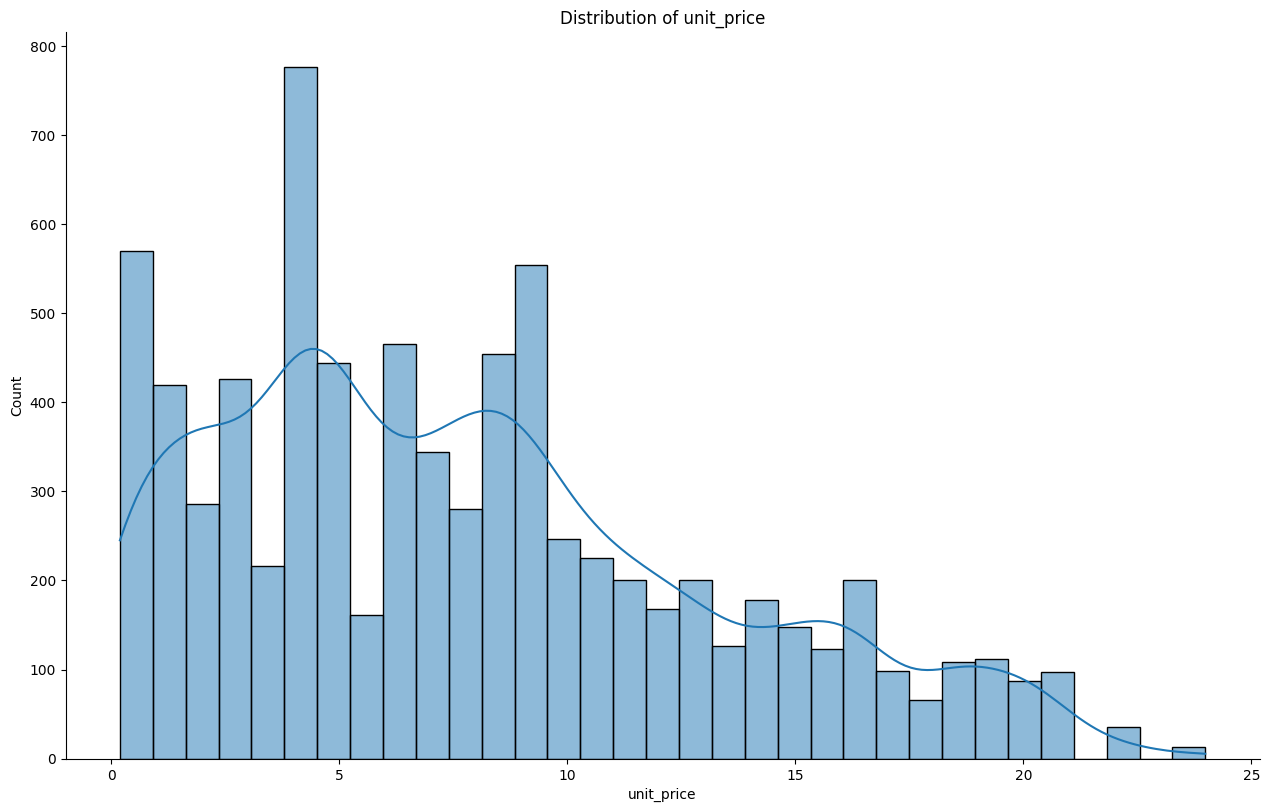

In [9]:
plot_continuous_distribution(df, 'unit_price')

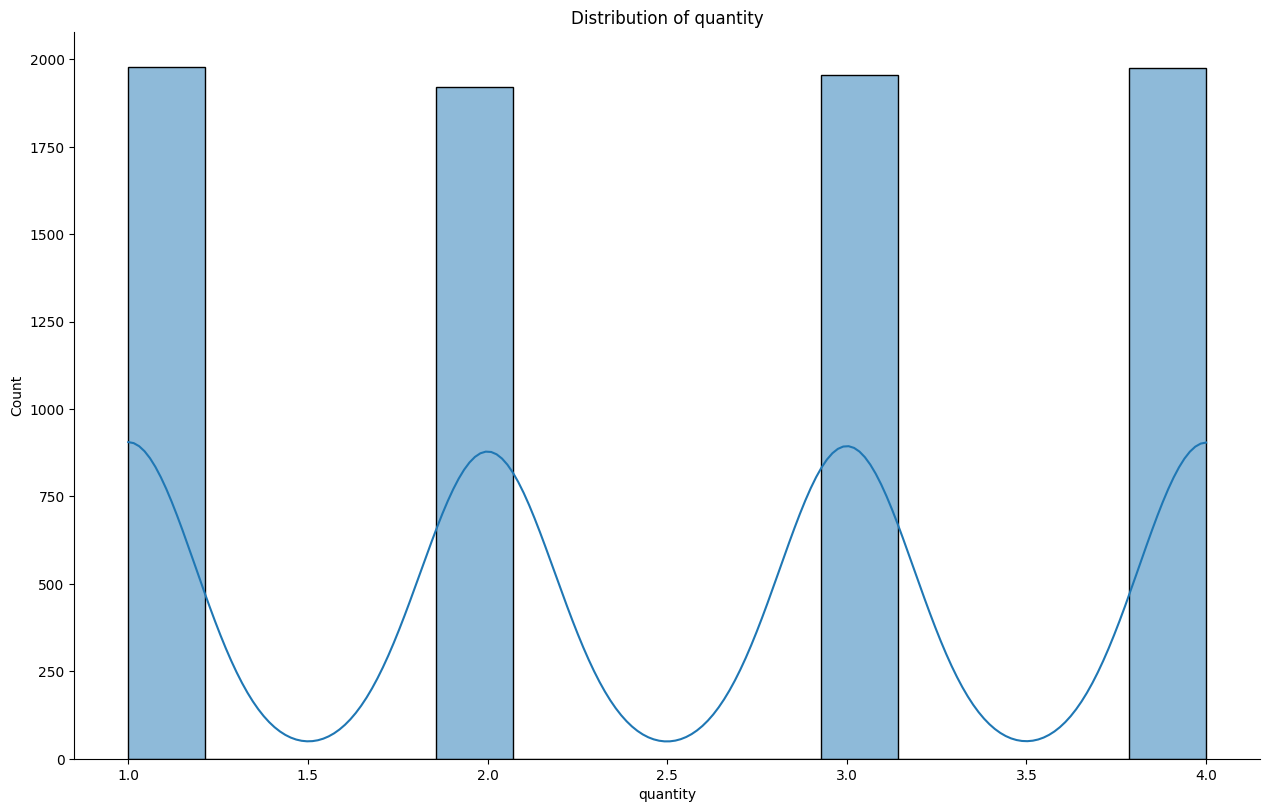

In [10]:
plot_continuous_distribution(df, 'quantity')

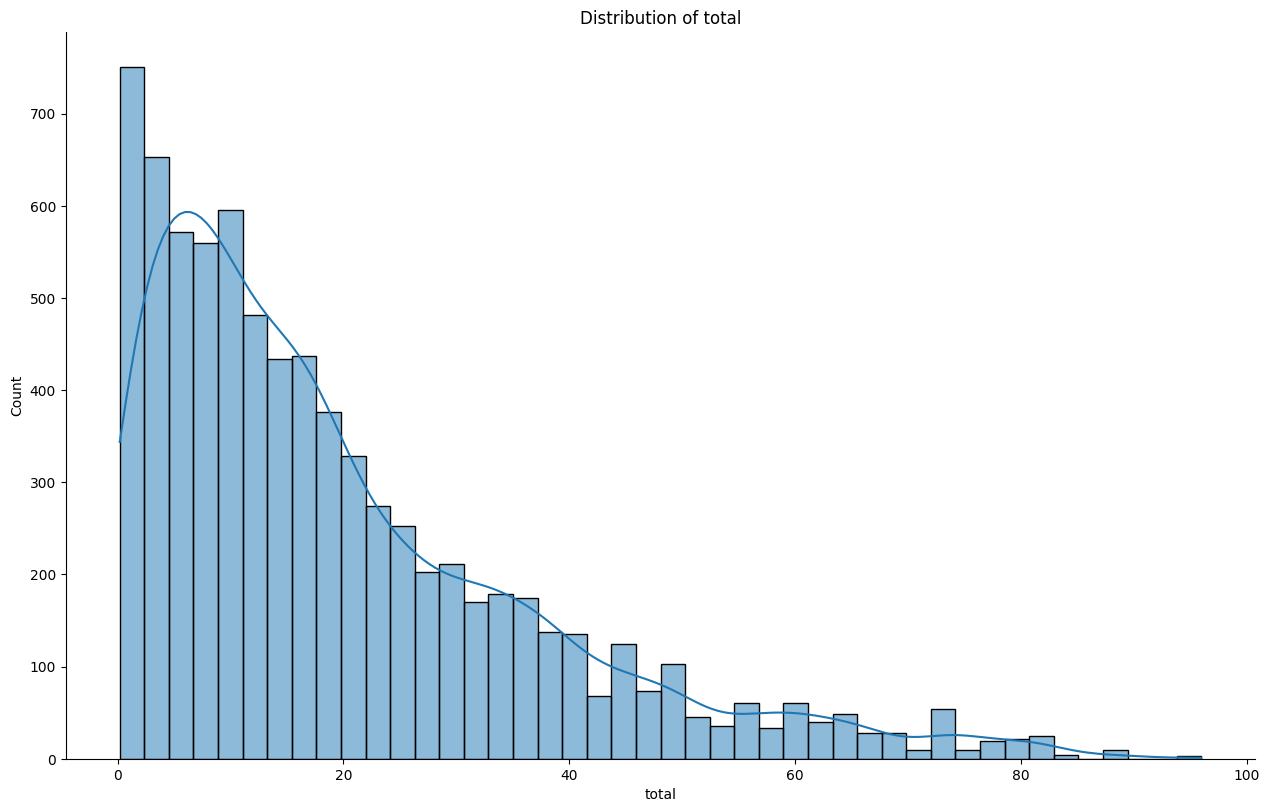

In [11]:
plot_continuous_distribution(df, 'total')

In [12]:
get_unique_values(df, 'transaction_id')

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64


In [13]:
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


In [14]:
get_unique_values(df, 'category')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


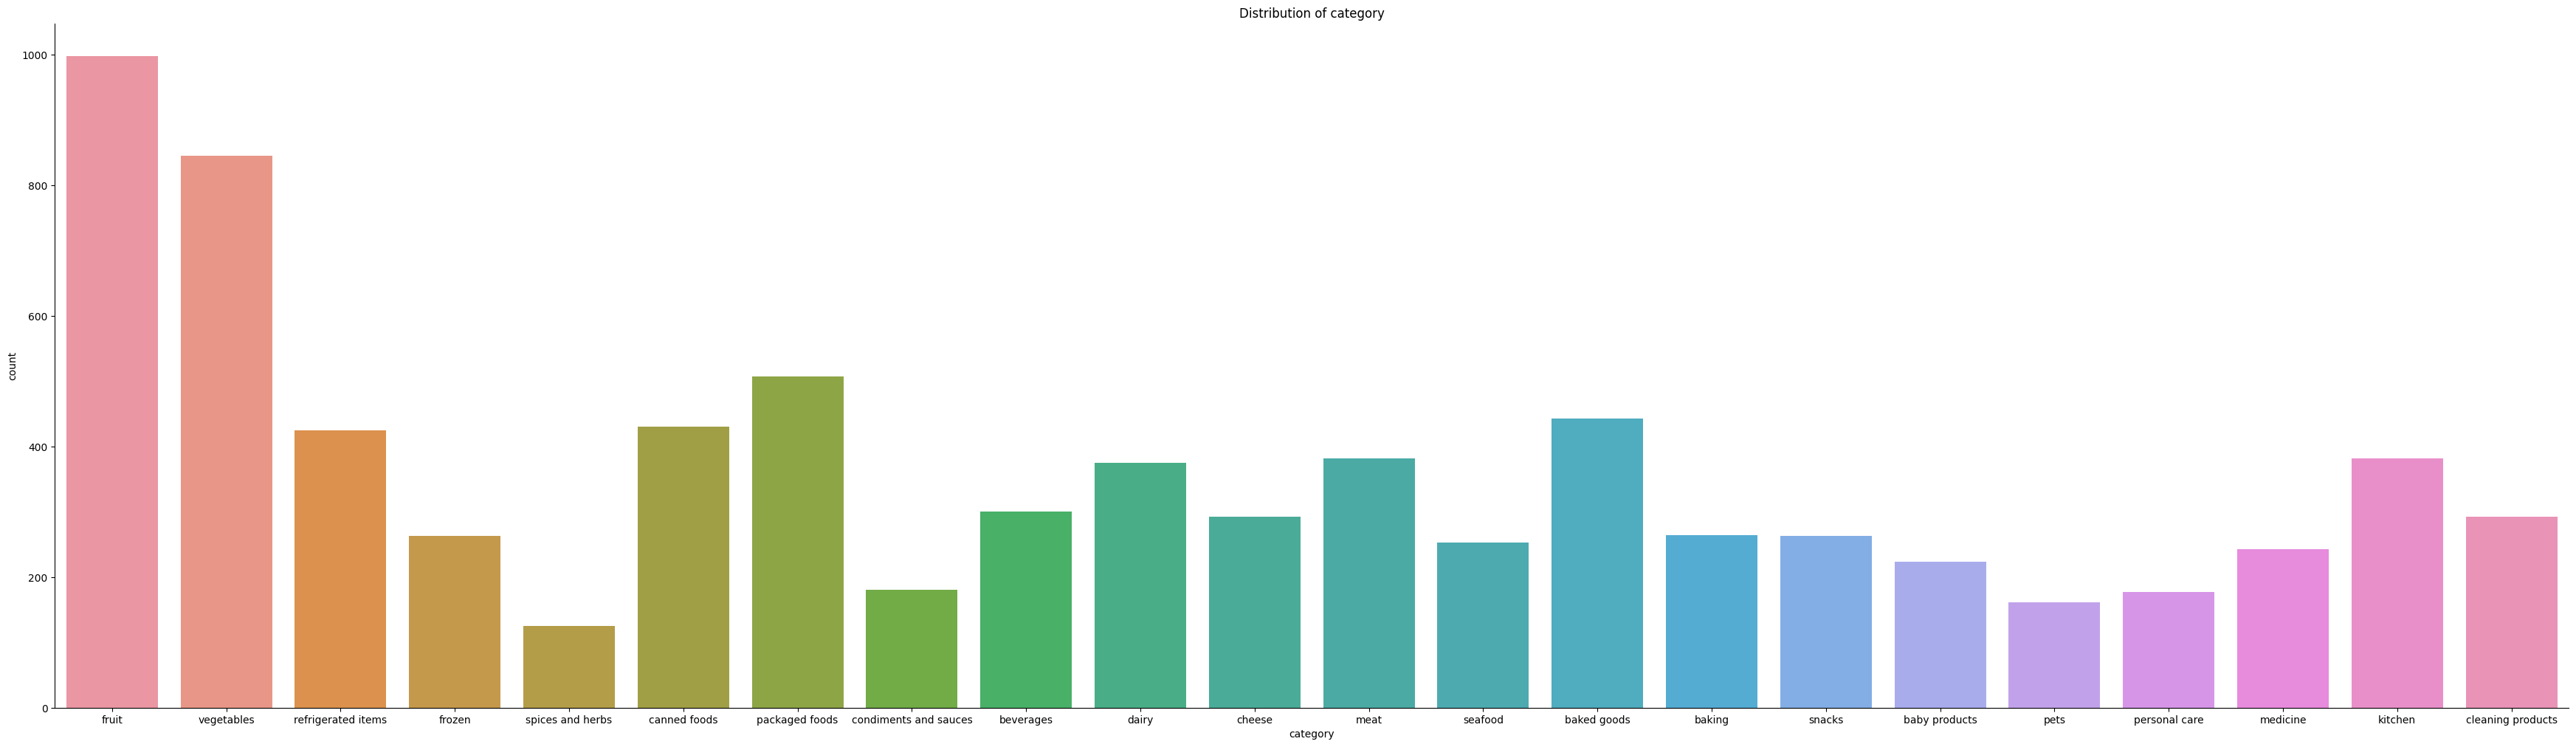

In [15]:
plot_categorical_distribution(df, 'category', height=10, aspect=3.5)

In [16]:
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


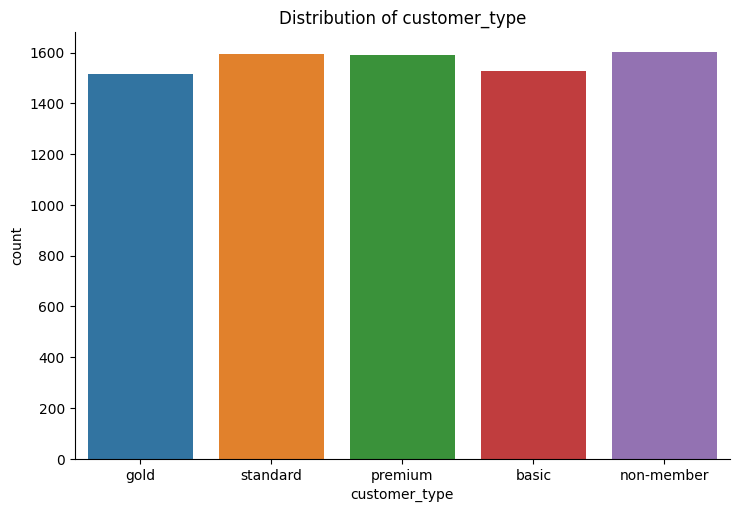

In [17]:
plot_categorical_distribution(df, 'customer_type', height=5, aspect=1.5)

In [18]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


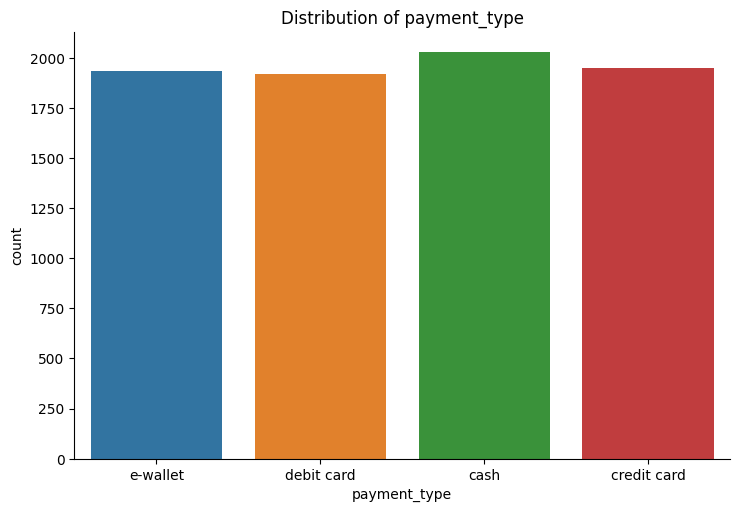

In [19]:
plot_categorical_distribution(df, 'payment_type', height=5, aspect=1.5)

In [20]:
get_unique_values(df, 'timestamp')

Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64


In [21]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [22]:
df = convert_to_datetime(df, 'timestamp')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [24]:
df['hour'] = df['timestamp'].dt.hour

In [25]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [26]:
get_unique_values(df, 'hour')

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


In [27]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-27-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,unit_price,quantity,total,hour
unit_price,1.000000,0.024588,0.792018,0.010842
quantity,0.024588,1.000000,0.521926,-0.008410
total,0.792018,0.521926,1.000000,0.010354
hour,0.010842,-0.008410,0.010354,1.000000


MODELING

In [28]:
sales_df = pd.read_csv('/content/sales.csv')
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [29]:
stock_df = pd.read_csv('/content/sensor_stock_levels.csv')
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [30]:
temp_df = pd.read_csv('/content/sensor_storage_temperature.csv')
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


DATA CLEANUP

In [31]:
sales_df.info()
print('\n')
stock_df.info()
print('\n')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id          

In [32]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [33]:
sales_df = convert_to_datetime(sales_df, 'timestamp')
sales_df.info()

print('\n')

stock_df = convert_to_datetime(stock_df, 'timestamp')
stock_df.info()

print('\n')

temp_df = convert_to_datetime(temp_df, 'timestamp')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id        

DATA MERGE

In [34]:
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [35]:
def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [36]:
sales_df = convert_timestamp_to_hourly(sales_df, 'timestamp')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [37]:
stock_df = convert_timestamp_to_hourly(stock_df, 'timestamp')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [38]:
temp_df = convert_timestamp_to_hourly(temp_df, 'timestamp')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [39]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [40]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [41]:
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


In [42]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [43]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [44]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


In [45]:
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [46]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885,pets


In [47]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885,pets,8.19


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


TRANSFORM DATA

In [49]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885,pets,8.19,1,1,9


In [50]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885,14.19,1,1,9,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885,20.19,1,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885,8.19,1,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        3067 non-null   float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   timestamp_day_of_month          10845 non-null  int64  
 6   timestamp_day_of_week           10845 non-null  int64  
 7   timestamp_hour                  10845 non-null  int64  
 8   category_baby products          10845 non-null  uint8  
 9   category_baked goods            10845 non-null  uint8  
 10  category_baking                 10845 non-null  uint8  
 11  category_beverages              10845 non-null  uint8  
 12  category_canned foods           

In [52]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,NaN,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,NaN,-0.02885,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,NaN,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


MORE MODELING

In [53]:
X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


In [54]:
K = 10
split = 0.75

In [55]:
accuracy = []

for fold in range(0, K):

  model = RandomForestRegressor()
  scaler = StandardScaler()

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

  X_train = imputer.fit_transform(X_train)
  X_test = imputer.transform(X_test)

  trained_model = model.fit(X_train, y_train)

  y_pred = trained_model.predict(X_test)

  mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
  accuracy.append(mae)
  print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.237
Fold 2: MAE = 0.237
Fold 3: MAE = 0.238
Fold 4: MAE = 0.237
Fold 5: MAE = 0.237
Fold 6: MAE = 0.236
Fold 7: MAE = 0.237
Fold 8: MAE = 0.237
Fold 9: MAE = 0.236
Fold 10: MAE = 0.236
Average MAE: 0.24


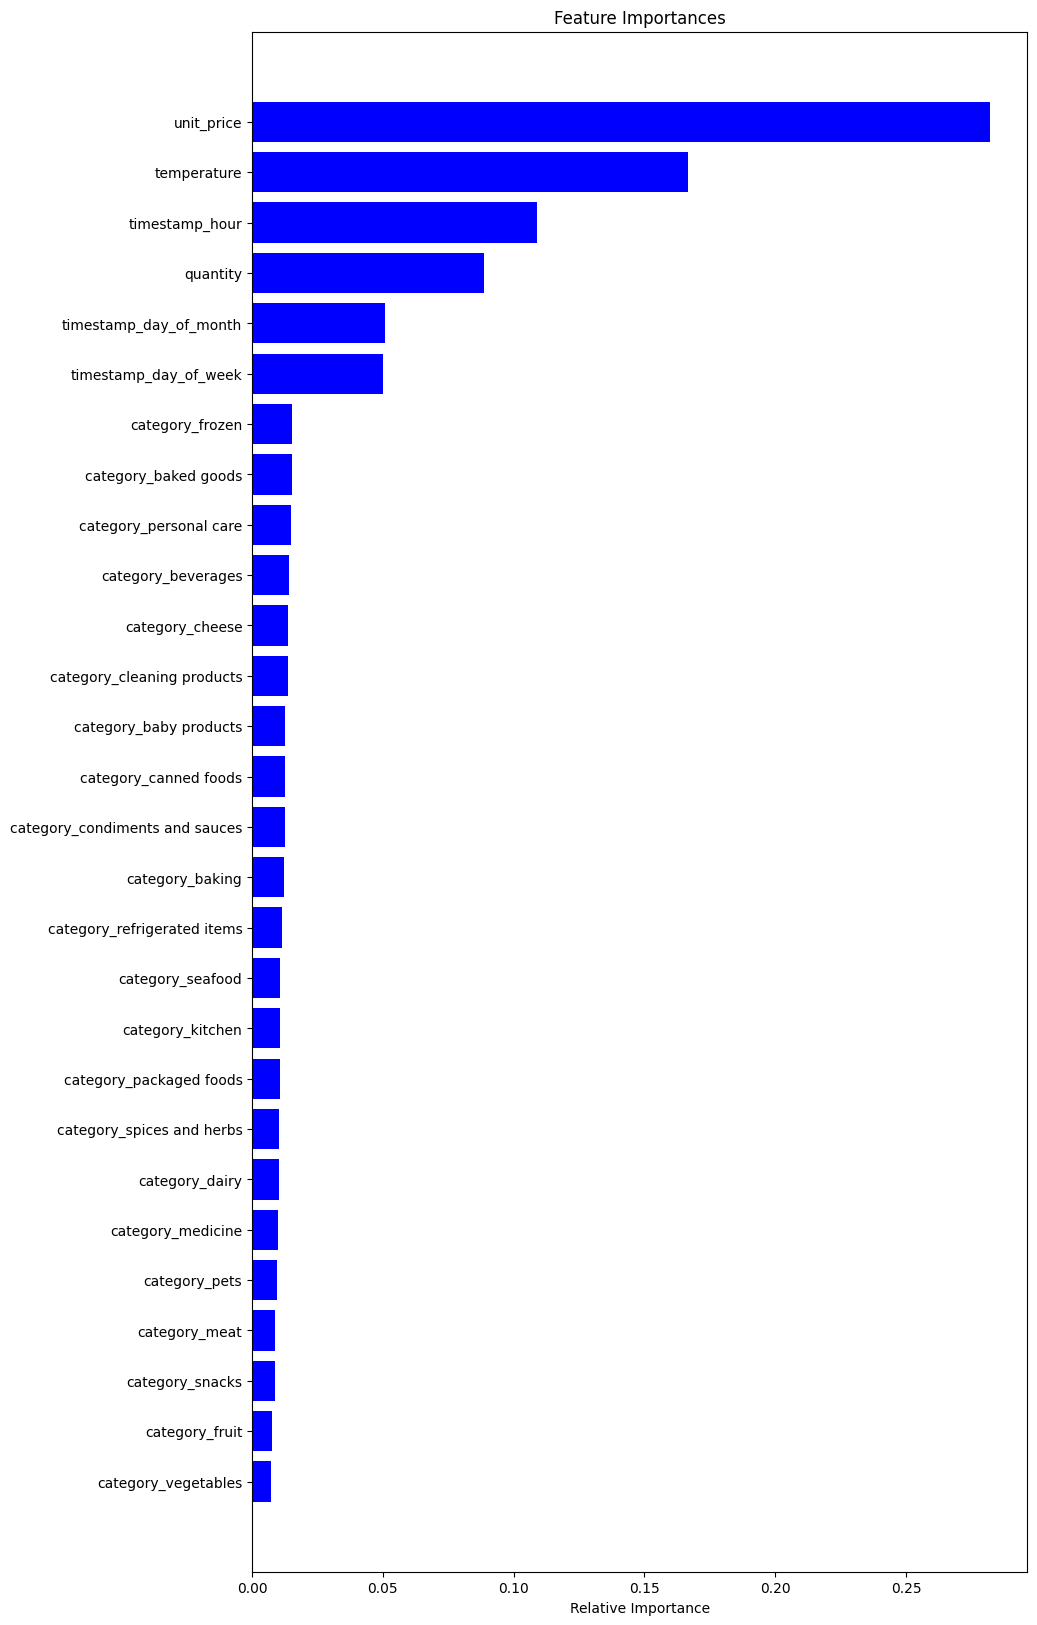

In [56]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ML PRODUCTION

In [57]:
#change this with a csv path
filepath = '/content/sales.csv'

In [58]:
def load_csv_dataset(file_path):

    df = pd.read_csv(file_path)

    print(f'{df.shape[0]} Rows \n{df.shape[1]} Columns \n')
    print(df.info(), '\n\n')
    print(df.describe())

    return df

In [59]:
def create_target_predictors(data: pd.DataFrame = None, target: str = "estimated_stock_pct"):

    X = data.drop(columns=[target])
    y = data[target]
    return X, y

In [60]:
def train_algorithm_with_cross_validation(X: pd.DataFrame = None, y: pd.Series = None):
    K = 10
    split = 0.75
    print("Function started...")

    mae_scores = []
    rmse_scores = []

    for fold in range(K):
        model = RandomForestRegressor(random_state=fold)
        scaler = StandardScaler()

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=fold)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        X_train = imputer.fit_transform(X_train)
        X_test = imputer.transform(X_test)

        trained_model = model.fit(X_train, y_train)

        y_pred = trained_model.predict(X_test)

        mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
        mae_scores.append(mae)

        rmse = sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))
        rmse_scores.append(rmse)

        print(f"Fold {fold + 1}: MAE = {mae:.3f}, RMSE = {rmse:.3f}")

    avg_mae = sum(mae_scores) / K
    avg_rmse = sum(rmse_scores) / K
    print(f"Average MAE: {avg_mae:.2f}")
    print(f"Average RMSE: {avg_rmse:.2f}")
    return avg_mae, avg_rmse

In [61]:
X, y = create_target_predictors(merged_df, "estimated_stock_pct")
avg_mae, avg_rmse = train_algorithm_with_cross_validation(X, y)

Function started...
Fold 1: MAE = 0.237, RMSE = 0.284
Fold 2: MAE = 0.233, RMSE = 0.282
Fold 3: MAE = 0.240, RMSE = 0.286
Fold 4: MAE = 0.233, RMSE = 0.281
Fold 5: MAE = 0.237, RMSE = 0.285
Fold 6: MAE = 0.241, RMSE = 0.289
Fold 7: MAE = 0.235, RMSE = 0.283
Fold 8: MAE = 0.237, RMSE = 0.285
Fold 9: MAE = 0.242, RMSE = 0.290
Fold 10: MAE = 0.238, RMSE = 0.285
Average MAE: 0.24
Average RMSE: 0.29


TUNNING HYPERPARAMETERS

In [62]:
df = merged_df
X = df.drop(columns=['estimated_stock_pct'])
y = df['estimated_stock_pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

grid_search.fit(X_train_imputed, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

(best_params, best_score)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


({'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.22416448332255942)

In [63]:
optimized_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

optimized_rf.fit(X_train_imputed, y_train)
optimized_y_pred = optimized_rf.predict(X_test_imputed)
optimized_mae = mean_absolute_error(y_true=y_test, y_pred=optimized_y_pred)

optimized_rmse = math.sqrt(mean_squared_error(y_test, optimized_y_pred))

print(f"Optimized MAE: {optimized_mae}")
print(f"Optimized RMSE: {optimized_rmse}")


Optimized MAE: 0.22276956922006652
Optimized RMSE: 0.2645458724446468


In [64]:
#neural network
def build_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.1),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

nn_model = build_model((X_train_imputed.shape[1],))

nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

history = nn_model.fit(
    X_train_imputed,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

y_pred_nn = nn_model.predict(X_test_imputed)

mae_nn = mean_absolute_error(y_test, y_pred_nn.flatten())
print(f"Neural Network MAE: {mae_nn}")

rmse_nn = math.sqrt(mean_squared_error(y_test, y_pred_nn.flatten()))
print(f"Neural Network RMSE: {rmse_nn}")

Epoch 1/100
204/204 [==============================] - 2s 4ms/step - loss: 0.0906 - val_loss: 0.0738
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0770 - val_loss: 0.0729
Epoch 3/100
204/204 [==============================] - 1s 4ms/step - loss: 0.0750 - val_loss: 0.0734
Epoch 4/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0727 - val_loss: 0.0722
Epoch 5/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0723 - val_loss: 0.0719
Epoch 6/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0711 - val_loss: 0.0713
Epoch 7/100
204/204 [==============================] - 1s 5ms/step - loss: 0.0709 - val_loss: 0.0714
Epoch 8/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0715 - val_loss: 0.0708
Epoch 9/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0709 - val_loss: 0.0708
Epoch 10/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0708 - val_lo

IMPLEMENTING 1D CNN Model

In [65]:
df = merged_df

X = df.drop(columns=['estimated_stock_pct'])
y = df['estimated_stock_pct'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

X_train_reshaped = X_train_imputed.reshape((X_train_imputed.shape[0], X_train_imputed.shape[1], 1))
X_test_reshaped = X_test_imputed.reshape((X_test_imputed.shape[0], X_test_imputed.shape[1], 1))

def build_1d_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='linear')
    ])
    return model

model = build_1d_cnn_model(X_train_reshaped.shape[1:])

model.compile(optimizer=Adam(), loss='mean_absolute_error')

history = model.fit(
    X_train_reshaped,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

y_pred = model.predict(X_test_reshaped)
mae = mean_absolute_error(y_test, y_pred.flatten())
print(f'Mean Absolute Error: {mae}')

rmse_cnn = math.sqrt(mean_squared_error(y_test, y_pred.flatten()))
print(f"1D CNN Model RMSE: {rmse_cnn}")

Epoch 1/100
204/204 [==============================] - 2s 6ms/step - loss: 0.2640 - val_loss: 0.2221
Epoch 2/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2433 - val_loss: 0.2246
Epoch 3/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2372 - val_loss: 0.2229
Epoch 4/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2330 - val_loss: 0.2213
Epoch 5/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2285 - val_loss: 0.2211
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 0.2283 - val_loss: 0.2215
Epoch 7/100
204/204 [==============================] - 1s 6ms/step - loss: 0.2255 - val_loss: 0.2208
Epoch 8/100
204/204 [==============================] - 1s 7ms/step - loss: 0.2245 - val_loss: 0.2212
Epoch 9/100
204/204 [==============================] - 2s 8ms/step - loss: 0.2243 - val_loss: 0.2207
Epoch 10/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2233 - val_lo

In [66]:
def build_1d_cnn_model_with_regularization(input_shape, l1_value=0.01, l2_value=0.01):
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape, kernel_regularizer=l2(l2_value)), MaxPooling1D(pool_size=2), Flatten(), Dense(50, activation='relu', kernel_regularizer=l1(l1_value)),  # L1 regularization
        Dropout(0.5), Dense(1, activation='linear')])

    return model

model = build_1d_cnn_model_with_regularization(X_train_reshaped.shape[1:], l1_value=0.01, l2_value=0.01)
model.compile(optimizer=Adam(), loss='mean_absolute_error')

history = model.fit(
    X_train_reshaped,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

y_pred = model.predict(X_test_reshaped)
mae = mean_absolute_error(y_test, y_pred.flatten())
print(f'Mean Absolute Error with Regularization: {mae}')

rmse_cnn_reg = math.sqrt(mean_squared_error(y_test, y_pred.flatten()))
print(f"1D CNN Model with Regularization RMSE: {rmse_cnn_reg}")

Epoch 1/100
204/204 [==============================] - 2s 6ms/step - loss: 3.1901 - val_loss: 0.3213
Epoch 2/100
204/204 [==============================] - 1s 5ms/step - loss: 0.3224 - val_loss: 0.3013
Epoch 3/100
204/204 [==============================] - 1s 4ms/step - loss: 0.2996 - val_loss: 0.2851
Epoch 4/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2903 - val_loss: 0.2788
Epoch 5/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2819 - val_loss: 0.2724
Epoch 6/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2781 - val_loss: 0.2702
Epoch 7/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2764 - val_loss: 0.2705
Epoch 8/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2749 - val_loss: 0.2686
Epoch 9/100
204/204 [==============================] - 1s 5ms/step - loss: 0.2740 - val_loss: 0.2694
Epoch 10/100
204/204 [==============================] - 1s 7ms/step - loss: 0.2732 - val_lo